In [4]:
import numpy as np
from numpy.random import normal, uniform
import scipy.io as sio
import math
import scipy
import scipy.stats as stat

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
mat_contents = sio.loadmat('2_data.mat')

In [6]:
X = mat_contents['x']
t = mat_contents['t']

In [7]:
# setting values
beta = 1
alpha = math.pow(10, -6)

In [8]:
# initial state

m0 = np.array([0., 0., 0., 0., 0., 0., 0.]) #
S0_inv = alpha*np.identity(7) 
posterior = stat.multivariate_normal(mean = m0, cov = S0_inv) # initial prior_inverse


In [9]:
def basis_function(data, Weights = [] , given_weights = False):
    
    M = 7
    s = 0.1
    
    basis_matrix = list()

    for record in data: 
        data_list = []
        for j in range(M):
            if j == 0:
                mu_j  = 0
            else:
                mu_j = float((2*j)/M)
                
            x_minus_mu = (record - mu_j ) / s
            
            if given_weights == True:
                sigmoid_x = Weights[j] *sigmoid(x_minus_mu)
            else:
                sigmoid_x = sigmoid(x_minus_mu)
            data_list.append(sigmoid_x)

        basis_matrix.append(data_list)


    basis_matrix = np.array(basis_matrix).reshape([len(data), M])
    return basis_matrix
    
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [10]:
def find_w(data, target, beta, alpha): # to check
    
    N = len(data)
    basis = basis_function(data)
    basis_dot = np.dot(basis.T, basis) + alpha*np.eye(7)
    basis_dot = beta*np.linalg.inv(basis_dot)
    basis_dot = np.dot(basis_dot, basis.T)
    basis_dot = np.dot(basis_dot, target)
    return basis_dot

In [11]:
e = find_w(X[:60], t[:60], beta, alpha)
e

array([[ -0.20832582],
       [ 11.14610303],
       [ -1.89460726],
       [  1.5176882 ],
       [ -5.8038987 ],
       [ -3.18404934],
       [ -9.31698176]])

In [12]:
def new_posterior(data, target, beta, alpha):
    
    basis = basis_function(data)
    basisT = basis.T

    new_S = np.linalg.inv(alpha * np.diag(np.ones(7)) + beta * basisT.dot(basis))
    new_m = beta * new_S.dot(basisT).dot(target)
    
    m = []
    for i in new_m:
        m.append(i[0])
        
    new_m = np.array(m)
    posterior = stat.multivariate_normal(mean = new_m , cov = new_S )

    return posterior, new_m, new_S

In [13]:
def get_mean_covariane(N, X, Y, beta, alpha_recipro):
    
    X_data, t_data = X[:N], Y[:N]
    
    sorted_X = np.array(sorted(X[:N])) # sorted N data
    
    post, new_m, new_S = new_posterior(X_data, t_data, beta, alpha_recipro)
    
    
    return post, new_m, new_S, sorted_X

# 2.1

In [21]:
post10, m10, S10, sorted10 = get_mean_covariane(10, X, t, beta, alpha)
post15, m15, S15, sorted15 = get_mean_covariane(15, X, t, beta, alpha)
post30, m30, S30, sorted30 = get_mean_covariane(30, X, t, beta, alpha)
post80, m80, S80, sorted80 = get_mean_covariane(60, X, t, beta, alpha)
post60, m60, S60, sorted60 = get_mean_covariane(60, X, t, beta, alpha)

In [12]:
print('N = 10:','mean:'+'\t', m10 )
print()
print('N = 10', 'covariances', S10)

N = 10: mean:	 [  0.65816839   6.56900994   4.47161766  -5.19232775   0.30683732
  -2.70731155 -12.93480385]

N = 10 covariances [[  11.74844606  -45.13183578   57.51651542  -53.28263165   47.81732525
   -23.09680649    4.98836982]
 [ -45.13183578  186.11942006 -243.6042185   226.73082952 -203.6058234
    98.3513931   -21.24177114]
 [  57.51651542 -243.6042185   327.17144482 -313.86749389  283.55142864
  -137.0512211    29.60342635]
 [ -53.28263165  226.73082952 -313.86749389  318.58097503 -293.07005739
   142.21832712  -30.76334672]
 [  47.81732525 -203.6058234   283.55142864 -293.07005739  276.29194886
  -137.93198009   30.41415771]
 [ -23.09680649   98.3513931  -137.0512211   142.21832712 -137.93198009
    74.77288329  -19.93938959]
 [   4.98836982  -21.24177114   29.60342635  -30.76334672   30.41415771
   -19.93938959    9.07926812]]


In [13]:
print('N = 15:','mean:'+'\t', m15 )
print()
print('N = 15', 'covariances', S15)

N = 15: mean:	 [ -1.29839592  14.9439402   -7.78968709   8.31956943 -12.02884643
   2.83821224 -13.79152896]

N = 15 covariances [[  3.9101095  -11.80732662  11.79648808  -6.61631585   3.74523425
   -1.45634936   0.52849964]
 [-11.80732662  44.42869426 -49.04149853  27.91609081 -15.84926623
    6.16666844  -2.23835515]
 [ 11.79648808 -49.04149853  57.71564428 -35.45778281  20.707921
   -8.11304334   2.95345492]
 [ -6.61631585  27.91609081 -35.45778281  26.84820193 -17.85259394
    7.40666631  -2.7755787 ]
 [  3.74523425 -15.84926623  20.707921   -17.85259394  14.85384119
   -8.77275241   3.96100555]
 [ -1.45634936   6.16666844  -8.11304334   7.40666631  -8.77275241
   10.05835841  -6.80399544]
 [  0.52849964  -2.23835515   2.95345492  -2.7755787    3.96100555
   -6.80399544   6.25063527]]


In [14]:
print('N = 30:','mean:'+'\t', m30 )
print()
print('N = 30', 'covariances', S30)

N = 30: mean:	 [ -1.91468609  17.1267577   -9.55822961   8.01656775 -10.11101665
  -1.71138079  -9.89206398]

N = 30 covariances [[  1.36509916  -3.59710179   3.41142343  -2.0383279    1.16791206
   -0.39413822   0.10306912]
 [ -3.59710179  11.94420157 -12.90391636   7.90485805  -4.55451624
    1.53907999  -0.40269729]
 [  3.41142343 -12.90391636  15.58050315 -10.90817398   6.58613523
   -2.25617425   0.59380843]
 [ -2.0383279    7.90485805 -10.90817398  10.31921394  -7.44251917
    2.79842845  -0.77036676]
 [  1.16791206  -4.55451624   6.58613523  -7.44251917   7.48596272
   -4.46505472   1.51298983]
 [ -0.39413822   1.53907999  -2.25617425   2.79842845  -4.46505472
    4.73375351  -2.5399153 ]
 [  0.10306912  -0.40269729   0.59380843  -0.77036676   1.51298983
   -2.5399153    2.26539449]]


In [18]:
print('N = 80:','mean:'+'\t', m80 )
print()
print('N = 80', 'covariances', S80)

N = 60: mean:	 [ -0.20832582  11.14610303  -1.89460726   1.5176882   -5.8038987
  -3.18404934  -9.31698176]

N = 60 covariances [[ 0.50523112 -0.97161554  0.69905442 -0.35735508  0.18818688 -0.0882121
   0.02900747]
 [-0.97161554  2.40041482 -2.22312263  1.23512216 -0.66720844  0.31468383
  -0.1036327 ]
 [ 0.69905442 -2.22312263  2.84922484 -2.19973606  1.3439997  -0.65433381
   0.21716847]
 [-0.35735508  1.23512216 -2.19973606  2.76241513 -2.34445631  1.27474665
  -0.43607339]
 [ 0.18818688 -0.66720844  1.3439997  -2.34445631  3.02189289 -2.2834409
   0.87745397]
 [-0.0882121   0.31468383 -0.65433381  1.27474665 -2.2834409   2.62316363
  -1.44436082]
 [ 0.02900747 -0.1036327   0.21716847 -0.43607339  0.87745397 -1.44436082
   1.18149838]]


In [22]:
print('N = 60:','mean:'+'\t', m60 )
print()
print('N = 60', 'covariances', S60)

N = 60: mean:	 [ -0.20832582  11.14610303  -1.89460726   1.5176882   -5.8038987
  -3.18404934  -9.31698176]

N = 60 covariances [[ 0.50523112 -0.97161554  0.69905442 -0.35735508  0.18818688 -0.0882121
   0.02900747]
 [-0.97161554  2.40041482 -2.22312263  1.23512216 -0.66720844  0.31468383
  -0.1036327 ]
 [ 0.69905442 -2.22312263  2.84922484 -2.19973606  1.3439997  -0.65433381
   0.21716847]
 [-0.35735508  1.23512216 -2.19973606  2.76241513 -2.34445631  1.27474665
  -0.43607339]
 [ 0.18818688 -0.66720844  1.3439997  -2.34445631  3.02189289 -2.2834409
   0.87745397]
 [-0.0882121   0.31468383 -0.65433381  1.27474665 -2.2834409   2.62316363
  -1.44436082]
 [ 0.02900747 -0.1036327   0.21716847 -0.43607339  0.87745397 -1.44436082
   1.18149838]]


# 2.2

In [23]:
weights10 = post10.rvs(5)
weights15 = post15.rvs(5)
weights30 = post30.rvs(5)
weights80 = post80.rvs(5)
weights60 = post60.rvs(5)

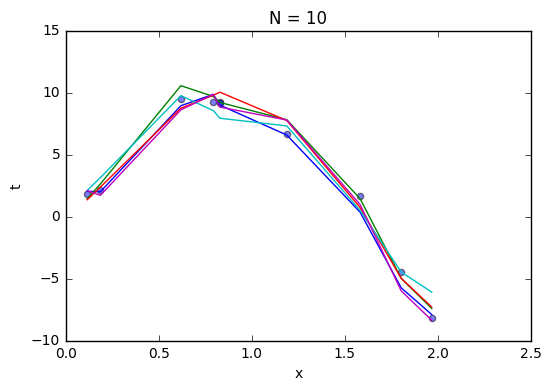

In [17]:
plt.plot()
plt.scatter(X[:10], t[:10], alpha = 0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('N = 10')       
for ws in weights10:
    plt.plot(sorted10,  np.array([ np.sum(i) for i in basis_function((sorted10), Weights = ws, given_weights = True)]), '-')

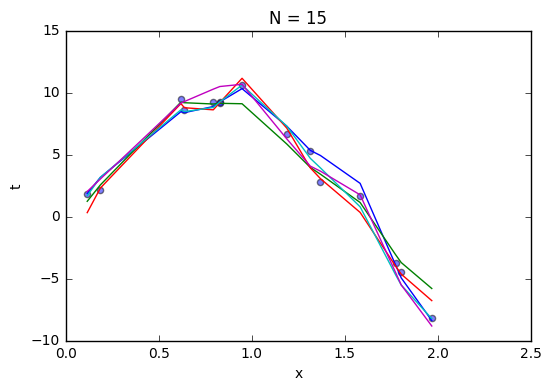

In [18]:
plt.plot()
plt.scatter(X[:15], t[:15], alpha = 0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('N = 15')       
for ws in weights15:
    plt.plot(sorted15,  np.array([ np.sum(i) for i in basis_function((sorted15), Weights = ws, given_weights = True)]), '-')

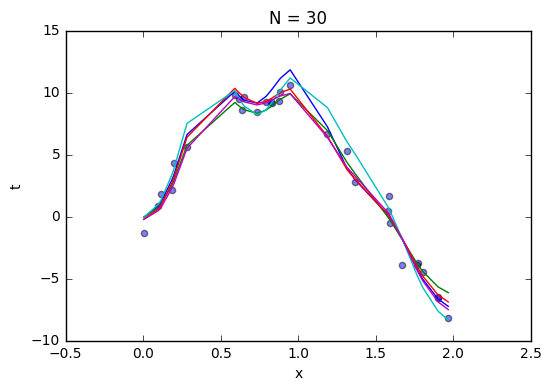

In [19]:
plt.plot()
plt.scatter(X[:30], t[:30], alpha = 0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('N = 30')       
for ws in weights30:
    plt.plot(sorted30,  np.array([ np.sum(i) for i in basis_function((sorted30), Weights = ws, given_weights = True)]), '-')

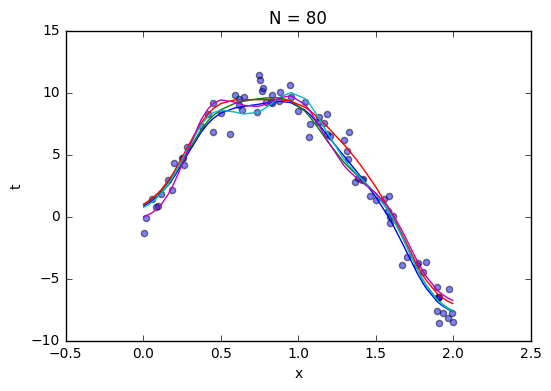

In [24]:
plt.plot()
plt.scatter(X[:80], t[:80], alpha = 0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('N = 80')       
for ws in weights80:
    plt.plot(sorted80,  np.array([ np.sum(i) for i in basis_function((sorted80), Weights = ws, given_weights = True)]), '-')

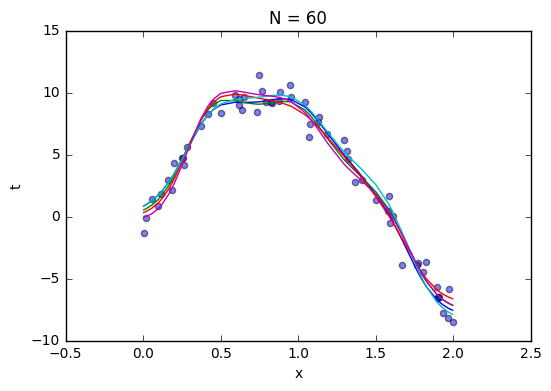

In [25]:
plt.plot()
plt.scatter(X[:60], t[:60], alpha = 0.5)
plt.xlabel('x')
plt.ylabel('t')
plt.title('N = 60')       
for ws in weights60:
    plt.plot(sorted60,  np.array([ np.sum(i) for i in basis_function((sorted60), Weights = ws, given_weights = True)]), '-')

# 2.3

In [28]:
def predictive(data, m, S, beta):
    
    basis = basis_function(data)
    basisT = basis.T
    
    mean = m.dot(basisT)
   
    var = 1/beta + np.sum(basis.dot(S) * basis, axis=1)
    var = np.sqrt(var)
    
    return mean, var

In [29]:
mean10, var10 = predictive(sorted10, m10, S10, beta)
mean15, var15 = predictive(sorted15, m15, S15, beta)
mean30, var30 = predictive(sorted30, m30, S30, beta)
mean80, var80 = predictive(sorted80, m80, S80, beta)
mean60, var60 = predictive(sorted60, m60, S60, beta)

=======N10=======


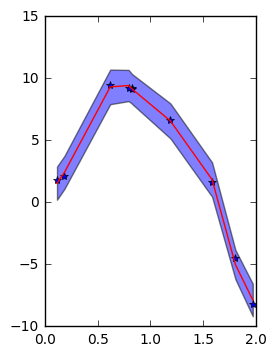

In [23]:
print('=======N10=======')
ax = plt.subplot(121)
ax.plot(X[:10], t[:10], '*')
ax.plot(sorted10, mean10, 'r', label='mean')
ax.fill_between(sorted10.reshape(1, len(sorted10))[0], mean10 - var10, mean10 + var10, alpha=0.5)
#ax.fill_between(X10, t10)
plt.show()

=======N15=======


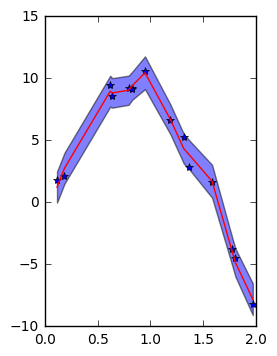

In [24]:
print('=======N15=======')
ax = plt.subplot(121)
ax.plot(X[:15], t[:15], '*')
ax.plot(sorted15, mean15, 'r', label='mean')
ax.fill_between(sorted15.reshape(1, len(sorted15))[0], mean15 - var15, mean15 + var15, alpha=0.5)
#ax.fill_between(X10, t10)
plt.show()

=======N30=======


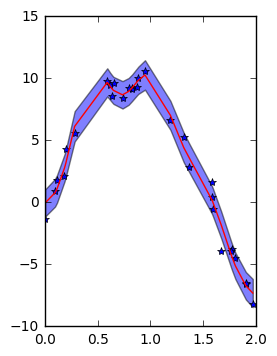

In [25]:
print('=======N30=======')
ax = plt.subplot(121)
ax.plot(X[:30], t[:30], '*')
ax.plot(sorted30, mean30, 'r', label='mean')
ax.fill_between(sorted30.reshape(1, len(sorted30))[0], mean30 - var30, mean30 + var30, alpha=0.5)
#ax.fill_between(X10, t10)
plt.show()

=======80=======


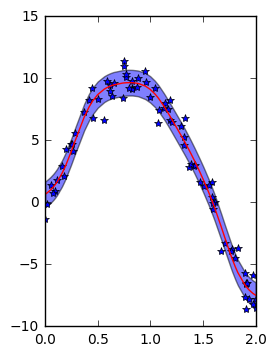

In [26]:
print('=======80=======')
ax = plt.subplot(121)
ax.plot(X[:80], t[:80], '*')
ax.plot(sorted80, mean80, 'r', label='mean')
ax.fill_between(sorted80.reshape(1, len(sorted80))[0], mean80 - var80, mean80 + var80, alpha=0.5)
#ax.fill_between(X10, t10)
plt.show()

=======60=======


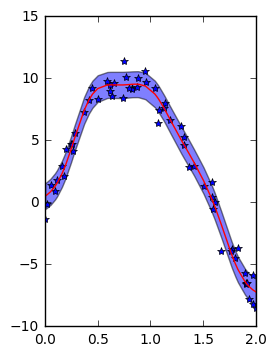

In [30]:
print('=======60=======')
ax = plt.subplot(121)
ax.plot(X[:60], t[:60], '*')
ax.plot(sorted60, mean60, 'r', label='mean')
ax.fill_between(sorted60.reshape(1, len(sorted60))[0], mean60 - var60, mean60 + var60, alpha=0.5)
#ax.fill_between(X10, t10)
plt.show()